# Import des données et nettoyage 

* Structure des données, type de variables
* Résumé statistique
* Données manquantes


In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
import nltk
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV
import pickle
import warnings
from scipy.stats import skew
from scipy.stats import norm
from scipy import stats
#Model 
from sklearn.preprocessing import StandardScaler 
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina'

In [2]:
file='C:/Users/zeine/Desktop/act_couv.csv'
data = pd.read_csv(file, sep= ';')

In [3]:
data.head()

,description,class
0,entreprises de menuiserie fabricant de porte p...,False
1,cheminees accessoires specialiste du fer forg...,False
2,bricolage outillage reproduction de cle robin...,False
3,vente pose de revetements de sols et de murs ...,False
4,vente installation de chauffage vente inst...,True


In [4]:
data.shape

(6663, 2)

In [5]:
data.iloc[0,0]

'entreprises de menuiserie fabricant de porte produits portail aluminium porte d entree porte d entree en aluminium porte de garage portes d entree alu  entreprises de menuiserie portes de garage portes  portails magasins de meubles '

In [6]:
data.describe()

,description,class
count,6663,6663
unique,3341,2
top,entreprises d electricite generale,False
freq,566,5705


In [7]:
data.groupby('class').describe()

description                                                    
            count unique                                     top freq
class                                                                
False        5705   2827  entreprises d electricite generale      561
True          958    580           entreprises de maconnerie      117

In [8]:
data.isnull().sum() / data.shape[1]

description    0.0
class          0.0
dtype: float64

**Remarque :**

On constate qu'il n y a pas de valeurs manquantes.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6663 entries, 0 to 6662
Data columns (total 2 columns):
description    6663 non-null object
class          6663 non-null bool
dtypes: bool(1), object(1)
memory usage: 58.6+ KB


**Analyse et Manipulation des données textuelles**


In [10]:
data['length']=data['description'].apply(len)

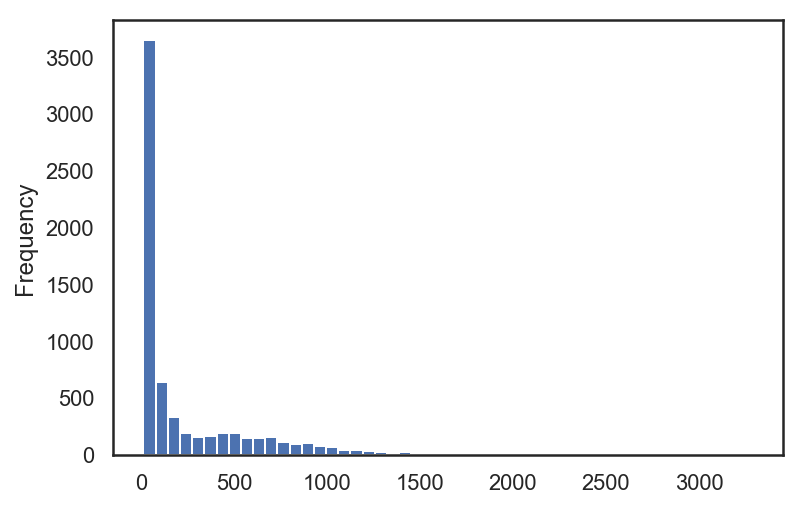

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data['length'].plot.hist(bins=50)

In [12]:
data['length'].describe()

count    6663.000000
mean      242.229326
std       352.565858
min        11.000000
25%        29.000000
50%        56.000000
75%       352.000000
max      3287.000000
Name: length, dtype: float64

Certaines descriptions sont trop longues.

In [13]:
data[data['length']==3287]['description'].iloc[0]

'fenetres devis gratuit  menuiseries sur mesure  fenetres pvc  alu  volets roulants  battants  portes  stores fabrication sur mesure  pose de menuiseries en aluminium  pvc  bois renovation de fenetre en bois  renovation de fenetre en pvc menuiserie pvc  alu et bois  volet battant et roulant  conception d escaliers porte fenetre en pvc  pose de fenetre  renovation de fenetre  baie en aluminium double fenetre  fenetre a double vitrage  fenetre a la francaise  fenetre alu  pvc porte fenetre en aluminium  porte fenetre en bois  porte fenetre sur mesure travaux tous corps d etat  gros oeuvre  peinture  isolation  revetement de sols  de murs suivi de projet  conseils sur le choix des produits  devis sur demande dressing et mobilier sur mesure  vitrage de fenetre  volet  isolation phonique isolation thermique  porte fenetre  double vitrage  motorisation  pilotage a distance pose de fenetre  brise soleil  remplacement de vitre  baie vitree pvc  fenetre acier renovation de fenetre  garantie dec

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000218A3AAD0F0>,
      dtype=object)

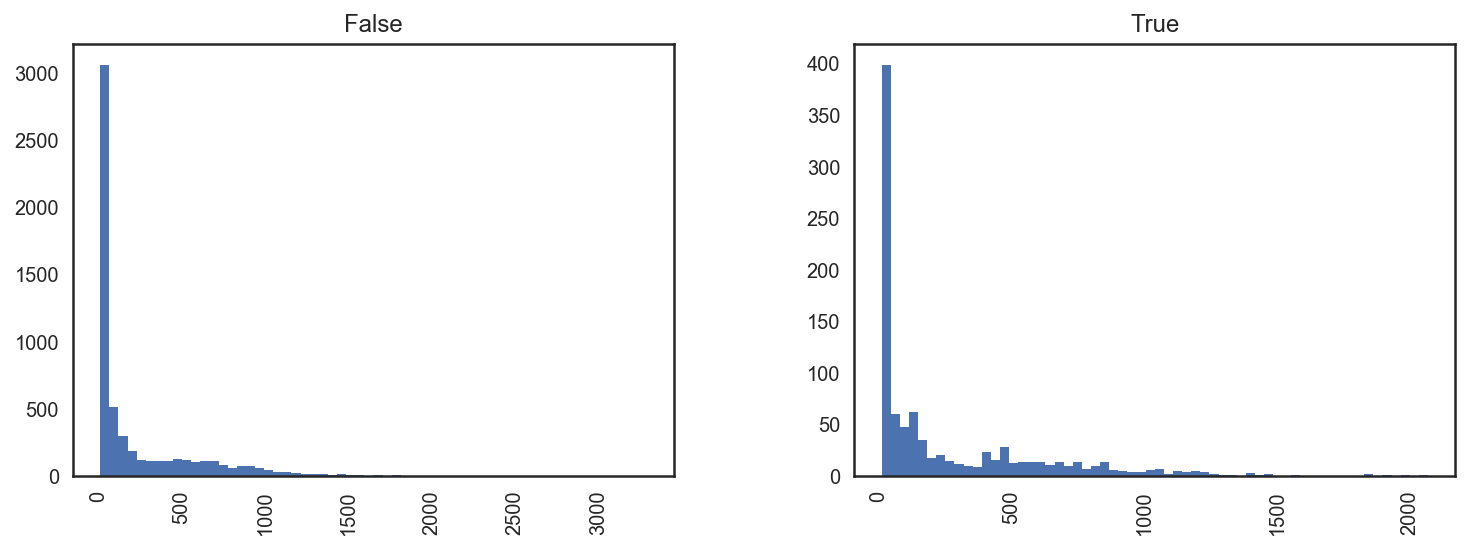

In [14]:
data.hist(column='length',by='class',bins=60,figsize=(12,4))

On peut remarquer que les descriptions classées "TRUE" ont en général plus de caractères

In [14]:
dict=['alors ',
'après ',
'au ',
'aucuns ',
'aussi ',
'autre ',
'avant ',
'avec ',
'avoir ',
'bon ',
'car ',
'ce ',
'cela ',
'ces',
'ceux',
'chaque',
'ci ',
'comme ',
'comment ',
'dans ',
'des ',
'du ',
'dedans ',
'dehors ',
'depuis ',
'devrait ',
'doit ',
'donc ',
'dos ',
'début ',
'elle ',
'elles ',
'en ',
'encore ',
'essai ',
'est ',
'et ',
'eu ',
'fait ',
'faites ',
'fois ',
'font ',
'hors ',
'ici ',
'il ',
'ils ',
'je ',
'juste ',
'la ',
'le ',
'les ',
'leur ',
'là ',
'ma ',
'maintenant ',
'mais ',
'mes ',
'mine ',
'moins ',
'mon ',
'mot ',
'même ',
'ni ',
'nommés ',
'notre ',
'nous ',
'ou ',
'où ',
'par ',
'parce ',
'pas ',
'peut ',
'peu ',
'plupart ',
'pour ',
'pourquoi ',
'quand ',
'que ',
'quel ',
'quelle ',
'quelles ',
'quels ',
'qui ',
'sa ',
'sans ',
'ses ',
'seulement ',
'si ',
'sien ',
'son ',
'sont ',
'sous ',
'soyez ',
'sujet ',
'sur ',
'ta ',
'tandis ',
'tellement ',
'tels ',
'tes ',
'ton ',
'tous ',
'tout ',
'trop ',
'très ',
'tu ',
'une ',
'voient ',
'vont ',
'votre ',
'vous ',
'vu ',
'ça ',
'étaient ',
'état ',
'étions ',
'été ',
'être ']

In [15]:
import spacy
from spacy.lang.fr.lemmatizer import lemmatizer

nlp = spacy.load('fr')

In [16]:
spacy_stopwords = spacy.lang.fr.stop_words.STOP_WORDS
print('Number of stop words: %d' % len(spacy_stopwords))
print('First ten stop words: %s' % list(spacy_stopwords)[:10])

Number of stop words: 600
First ten stop words: ['houp', 'lequel', 'basee', 'malgré', "qu'", 'dans', 'oh', 'chut', 'suivantes', 'parlent']


In [17]:
for i in range(len(dict)):
    if dict[i] not in spacy_stopwords:
        spacy_stopwords.add(dict[i])

In [18]:
len(spacy_stopwords)

715

In [19]:
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

In [20]:
import re
import string
punctuations = string.punctuation


# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
def cleanup_text(s):
    
    # Convert words to lower case 
    s = s.lower()

    #s = re.sub(r"'", " ", s) # appostrophe
    
    
    # removing stopwords
    s = [word for word in s.split() if word not in spacy_stopwords]
        
    # using a lemmatizer
    s = " ".join([lemmatizer(word) for word in s])
    
    # removing generated stopwords lemmatizer (no spacy french stemmer)
    s = [word for word in s.split() if word not in spacy_stopwords]
    s = " ".join([word for word in s])

    # remove punctuation except "!" and "?" from each word
    remove = string.punctuation
    remove = remove.replace("?", "") # don't remove Interrogation marks
    remove = remove.replace("!", "") # don't remove Exclamation marks
    pattern = r"[{}]".format(remove) # create the pattern
    re.sub(pattern, "", s) 
    
    # Return a list of words
    return(s)

In [21]:
data['spacy_clean_content'] = data['description'].apply(cleanup_text)

In [22]:
# Combine all training text into one large string
all_spacy_text = ' '.join([text for text in data['spacy_clean_content']])
print('Number of words in all_text:', len(all_spacy_text))

Number of words in all_text: 1272087


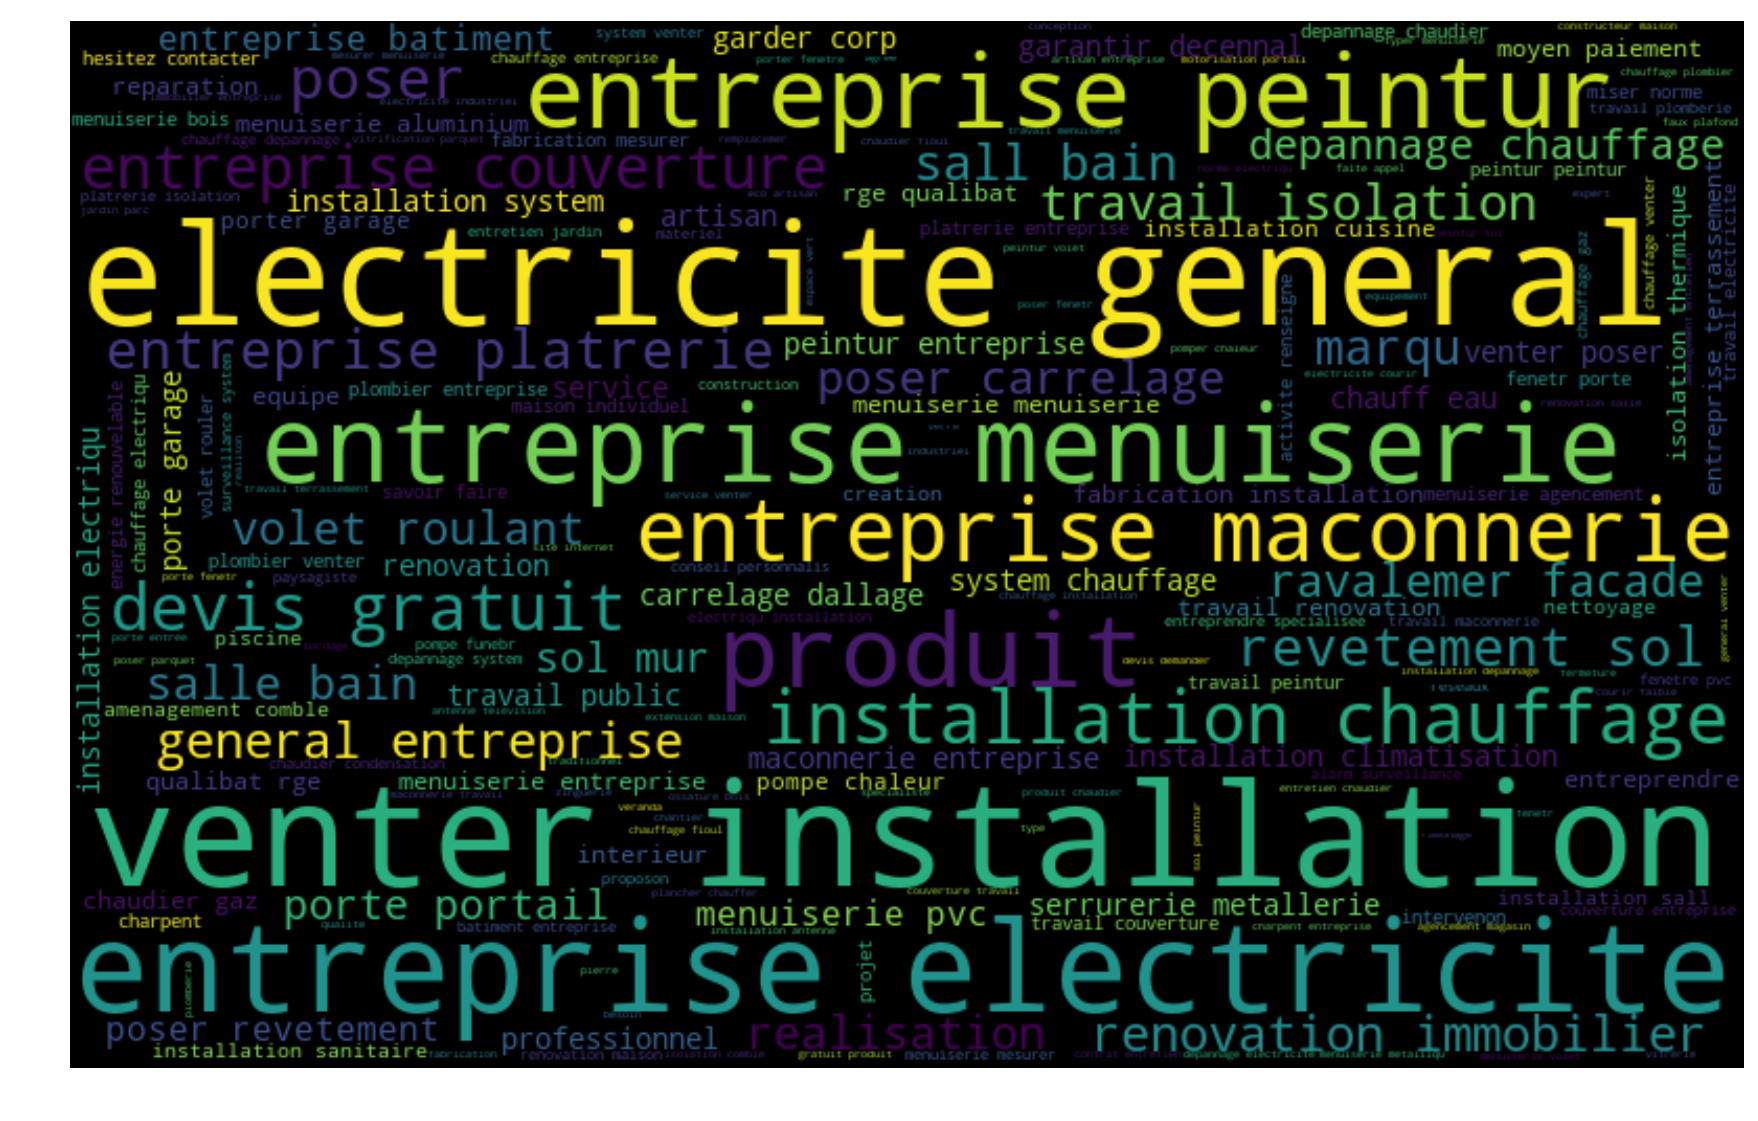

In [24]:
from wordcloud import WordCloud
wordcloud1 = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(all_spacy_text)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis('off')
plt.show()

**Text Embedding**

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
df = vectorizer.fit_transform(data['spacy_clean_content'])

feature_names=vectorizer.get_feature_names()

dense=df.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)

In [27]:
df.shape

(6663, 6846)

# Modélisation 

* Validation des méthodes et tuning
* Evaluation de la performance
* Importance des variables
* Comparaison des modèles


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, data['class'], test_size = 0.2, random_state = 1)


**AdaBoostClassifier**

In [33]:
from sklearn.ensemble import AdaBoostClassifier

params = { 'n_estimators': [16, 32] }
gs = GridSearchCV(AdaBoostClassifier(n_estimators=100), params, cv=4)
ada =gs.fit(X_train,y_train)
print(ada.best_estimator_)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=16, random_state=None)


In [34]:
y_pred_class = ada.best_estimator_.predict(X_test)

from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9114778694673669

**Random Forest**

In [35]:
from sklearn.ensemble import RandomForestClassifier

params={ 'n_estimators': [16, 32] }
gs = GridSearchCV(AdaBoostClassifier(n_estimators=100), params, cv=4)

rf=gs.fit(X_train, y_train)

y_pred_class = rf.best_estimator_.predict(X_test)

metrics.accuracy_score(y_test, y_pred_class)

0.9114778694673669

**Logistic regression**

In [36]:
from sklearn import linear_model

In [37]:
lr = linear_model.LogisticRegression()

%time lr.fit(X_train, y_train)

y_pred_class = lr.predict(X_test)

metrics.accuracy_score(y_test, y_pred_class)

Wall time: 436 ms


0.9122280570142536

**Lasso (Logistic Regression with L1 & L2 regularization)**

In [38]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=linear_model.LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=4)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.9148217636022514


In [39]:
logreg2=linear_model.LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 0.9122280570142536


**SVM**

In [40]:
from sklearn import svm
svm = svm.SVC(C=1000)
svm.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [41]:
y_pred = svm.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

[[1141    8]
 [ 107   77]]


In [42]:
metrics.accuracy_score(y_test, y_pred)

0.913728432108027

* Parmeters tunning for svm

In [44]:
from sklearn.svm import SVC
params=[
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]}]
gs = GridSearchCV(SVC(), params, cv=4)
md =gs.fit(X_train,y_train)
print(md.best_params_)

{'C': 1, 'kernel': 'linear'}


In [46]:
y_pred = md.best_estimator_.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9144786196549137

**KNN**

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11, weights='uniform')

knn.fit(X_train, y_train)

y_pred=knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8942235558889723

In [56]:
#from sklearn.neighbors import KNeighborsClassifier
#k_range = list(range(1, 31))
#param_grid = dict(n_neighbors=k_range)
#knn = KNeighborsClassifier()
#grid = GridSearchCV(knn, param_grid, cv=4, scoring='accuracy')
#grid.fit(X_train, y_train)
#print(grid.best_score_)
#print(grid.best_params_)

# Conclusions :



#### Après avoir réalisé les différentes étapes du processus à savoir : la préparation , l'exploration, et la modélisation ; j'ai appliqué plusieurs modèles de classification. On conclut, que SVM({'C': 1, 'kernel': 'linear'}) a la meilleure  accuracy  sur le jeu de test : 0.9144786196549137 